<a href="https://colab.research.google.com/github/EG-L/kaggle/blob/main/Newyork_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle --upgrade

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nyc-taxi-trip-duration

  0% 0.00/2.49M [00:00<?, ?B/s]
100% 2.49M/2.49M [00:00<00:00, 83.5MB/s]
 25% 5.00M/20.3M [00:00<00:01, 8.07MB/s]
100% 20.3M/20.3M [00:00<00:00, 27.8MB/s]
 78% 49.0M/62.9M [00:01<00:00, 28.1MB/s]
100% 62.9M/62.9M [00:01<00:00, 52.0MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
test = pd.read_csv('/content/test.zip')
train = pd.read_csv('/content/train.zip')

In [ ]:
print(test.shape , train.shape)

(625134, 9) (1458644, 11)


In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [ ]:
train.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
test.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
dtype: int64

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in 
vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
test_1 = test.copy()
train['id'] = train['id'].apply(lambda x:int(x[2:]))
test_1['id'] = test_1['id'].apply(lambda x:int(x[2:]))

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
import numpy as np

In [ ]:
np.unique(train['id'],return_counts=True)

print(train['id'].value_counts())

2047       1
1186154    1
3462095    1
1099308    1
1902144    1
          ..
2102952    1
2105001    1
3553468    1
2100907    1
1652859    1
Name: id, Length: 1458644, dtype: int64


In [ ]:
np.unique(train['store_and_fwd_flag'],return_counts=True)

(array(['N', 'Y'], dtype=object), array([1450599,    8045]))

In [ ]:
train['passenger_count'].value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
np.unique(train['vendor_id'],return_counts=True)

(array([1, 2]), array([678342, 780302]))

In [ ]:
print(max(train['trip_duration']),min(train['trip_duration']))

3526282 1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


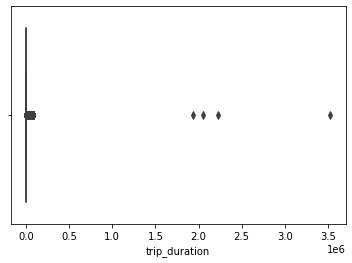

In [ ]:
sns.boxplot(train['trip_duration'])
plt.show()

In [ ]:
print(max(train['trip_duration']))

3526282


In [ ]:
train[train['trip_duration']>1500000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
355003,1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736
680594,369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578
924150,1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612
978383,53347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


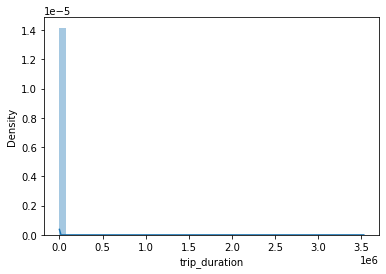

In [ ]:
sns.distplot(train['trip_duration'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


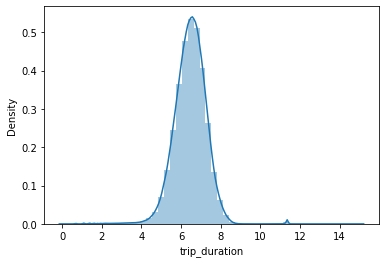

In [ ]:
sns.distplot(np.log(train['trip_duration']))
plt.show()

In [ ]:
train[train['trip_duration']==1]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
35196,2536510,1,2016-04-17 11:44:49,2016-04-17 11:44:50,1,-73.940384,40.786423,-73.940300,40.786373,N,1
207497,1520236,1,2016-05-17 09:03:38,2016-05-17 09:03:39,1,-73.819893,40.740822,-73.819885,40.740822,N,1
269418,553321,2,2016-04-11 19:01:35,2016-04-11 19:01:36,1,-73.945999,40.792202,-73.947411,40.792740,N,1
279493,1491861,1,2016-04-24 11:35:40,2016-04-24 11:35:41,1,-73.841423,40.695278,-73.841423,40.695274,N,1
285635,75470,1,2016-03-07 16:12:28,2016-03-07 16:12:29,1,-73.980690,40.744419,-73.980690,40.744419,N,1
311745,2959956,1,2016-02-25 04:26:50,2016-02-25 04:26:51,1,-73.806152,40.660206,-73.806267,40.660049,N,1
346102,2375785,1,2016-01-15 23:57:18,2016-01-15 23:57:19,1,-73.985825,40.755760,-73.985901,40.755829,N,1
346959,1171557,1,2016-02-10 16:33:43,2016-02-10 16:33:44,1,-73.776512,40.646454,-73.776512,40.646454,N,1
404610,3686648,1,2016-01-29 11:18:55,2016-01-29 11:18:56,1,-73.971954,40.750137,-73.971985,40.750130,N,1
451396,2836747,1,2016-01-26 10:47:22,2016-01-26 10:47:23,1,-74.001610,40.737450,-74.001610,40.737450,N,1


In [ ]:
train[train['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
62744,3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901
136519,3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4
194288,2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155
217765,3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251
263809,2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8
278290,796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9
301600,2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072
303133,414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15
337809,271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41
375972,3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
train.describe()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.999021e+06,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,1.154740e+06,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,9.992588e+05,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,1.998046e+06,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.999228e+06,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,4.000000e+06,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


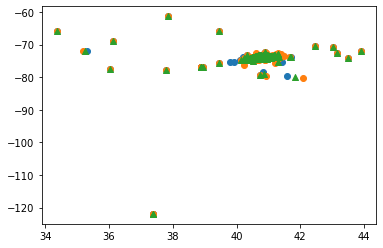

In [ ]:
plt.scatter(train['pickup_latitude'],train['pickup_longitude'])
plt.scatter(train['dropoff_latitude'],train['dropoff_longitude'])
plt.scatter((train['pickup_latitude']+train['dropoff_latitude'])/2,(train['pickup_longitude']+train['dropoff_longitude'])/2,marker='^')
plt.show()

In [ ]:
!pip install haversine

In [ ]:
from haversine import haversine

지구는 둥근 구형태를 띄기 때문에 점과 점사이의 거리를 재는데 맞지 않다.

따라서 haversine을 사용하여 구 형태를 띌 때 점과 점 사이를 계산하는 방식을 사용한다.

참조 : https://gaussian37.github.io/python-etc-%EC%9C%84%EB%8F%84,%EA%B2%BD%EB%8F%84-%EA%B0%84-%EA%B1%B0%EB%A6%AC/

참조 : https://kayuse88.github.io/haversine/

In [ ]:
pickup = [[j,i] for i,j in zip(train['pickup_longitude'],train['pickup_latitude'])]
dropoff = [[j,i] for i,j in zip(train['dropoff_longitude'],train['dropoff_latitude'])]
print(len(pickup),len(dropoff))
# 맨 처음에 위도랑 경도를 거꾸로 찍어서 follium 위치가 자꾸 엉뚱한 곳에 찍혀 i,j를 확인하여 뒤집어줬음

1458644 1458644


In [ ]:
# pickup = [[j,i] for i,j in zip(test_1['pickup_longitude'],test_1['pickup_latitude'])]
# dropoff = [[j,i] for i,j in zip(test_1['dropoff_longitude'],test_1['dropoff_latitude'])]
# print(len(pickup),len(dropoff))

625134 625134


In [ ]:
distance = []

for i in range(len(pickup)):
  distance.append(haversine(pickup[i],dropoff[i]))

In [ ]:
distance

[1.498522849490913,
 1.8055096626695613,
 6.385107314725875,
 1.4855004746287503,
 1.1885901010814812,
 1.0989439772287704,
 1.326280408993069,
 5.714988524657359,
 1.3103550928189498,
 5.121168635790396,
 3.8061446521394195,
 3.7731011500935896,
 1.8594855886565753,
 0.9916862203173129,
 6.3828445726228376,
 0.656578933044617,
 3.42809069704236,
 2.538675324592176,
 4.605207436547465,
 1.3032730173915161,
 2.50592965488477,
 1.7245524876362803,
 2.0670877212610304,
 4.8747990934211,
 20.602603473164297,
 4.559531233371279,
 6.056117856234436,
 3.7387472670384416,
 2.524852690684367,
 9.939456611599919,
 4.564599543037137,
 5.423059495109244,
 4.499290518670585,
 10.23839889752802,
 1.4331015727803458,
 1.4922386600089275,
 1.136393573786116,
 0.9594367242173654,
 3.312414956329904,
 2.587526948476956,
 5.477054103033874,
 2.236300592500799,
 1.972208348678973,
 1.1472415901597013,
 2.1987834300330587,
 8.171214249693136,
 1.3144486962120372,
 1.7707119717124136,
 5.06803946042003,
 3.

In [ ]:
print(max(distance),min(distance))

1240.9103906669181 0.0


In [ ]:
train['distance'] = distance

In [ ]:
# test_1['distance'] = distance

In [ ]:
train[train['passenger_count']==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
62744,3917283,2,2016-06-06 16:39:09,2016-06-07 16:30:50,0,-73.776367,40.645248,-73.776360,40.645260,N,85901,0.001426
136519,3645383,2,2016-01-01 05:01:32,2016-01-01 05:01:36,0,-73.993134,40.757473,-73.993294,40.757538,N,4,0.015301
194288,2840829,2,2016-02-21 01:33:52,2016-02-21 01:36:27,0,-73.946243,40.772903,-73.946770,40.774841,N,155,0.219994
217765,3762593,1,2016-01-04 12:24:17,2016-01-04 13:01:48,0,-73.815224,40.700081,-73.950699,40.755222,N,2251,12.958319
263809,2154895,1,2016-05-23 23:37:37,2016-05-23 23:37:45,0,-73.861633,40.705029,-73.861633,40.705029,N,8,0.000000
278290,796773,1,2016-02-07 17:23:48,2016-02-07 17:23:57,0,-73.954941,40.687866,-73.954742,40.687862,N,9,0.016731
301600,2091096,2,2016-01-01 23:52:46,2016-01-02 00:27:18,0,-73.993652,40.757046,-73.918869,40.757793,N,2072,6.299406
303133,414625,2,2016-01-05 18:52:20,2016-01-05 18:52:35,0,-73.985291,40.738335,-73.985352,40.738361,N,15,0.005938
337809,271506,2,2016-05-22 00:23:15,2016-05-22 00:23:56,0,-73.956718,40.777142,-73.956764,40.776958,N,41,0.020722
375972,3176865,2,2016-05-31 05:10:23,2016-05-31 05:10:38,0,-73.982468,40.727974,-73.982468,40.728001,N,15,0.002969


In [ ]:
train.describe()

,id,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.999021e+06,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02,3.440869e+00
std,1.154740e+06,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03,4.296544e+00
min,1.000000e+00,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00,0.000000e+00
25%,9.992588e+05,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02,1.231838e+00
50%,1.998046e+06,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02,2.093720e+00
75%,2.999228e+06,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03,3.875343e+00
max,4.000000e+06,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06,1.240910e+03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


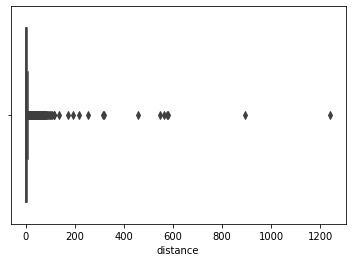

In [ ]:
sns.boxplot(train['distance'],data=train)
plt.show()

In [ ]:
# def get_outlier(train,column):
#   quantile_25 = np.percentile(train[column].values, 25)
#   quantile_75 = np.percentile(train[column].values, 75)

#   IQR = quantile_75 - quantile_25
  
#   lowest = quantile_25 - (IQR*1.5)
#   highest = quantile_75 + (IQR*1.5)
  
#   outlier_idx = train[column][ (train[column] < lowest) | (train[column] > highest) ].index
#   return outlier_idx

In [ ]:
# outlier_idx = get_outlier(train,'distance')

# outlier_idx

In [ ]:
# train.drop(outlier_idx, axis=0, inplace=True)

In [ ]:
# sns.boxplot(train['distance'])
# plt.show()

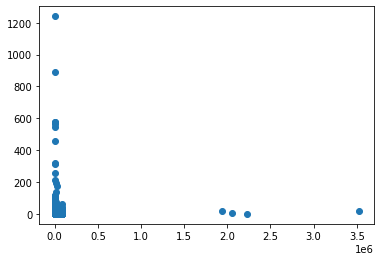

In [ ]:
plt.scatter(train['trip_duration'],train['distance'])
plt.show()

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
0,2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523
1,2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510
2,3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107
3,3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485500
4,2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188590


In [ ]:
temp = train[['trip_duration','distance']]
temp

,trip_duration,distance
0,455,1.498523
1,663,1.805510
2,2124,6.385107
3,429,1.485500
4,435,1.188590
...,...,...
1458639,778,1.225082
1458640,655,6.049844
1458641,764,7.824617
1458642,373,1.092565


In [ ]:
ss = StandardScaler()
train_scale = ss.fit_transform(temp)
train_scale

array([[-0.0963244 , -0.45207182],
       [-0.05661026, -0.38062209],
       [ 0.22234335,  0.68525766],
       ...,
       [-0.03732599,  1.02029665],
       [-0.11198093, -0.54655651],
       [-0.14539426, -0.53690267]])

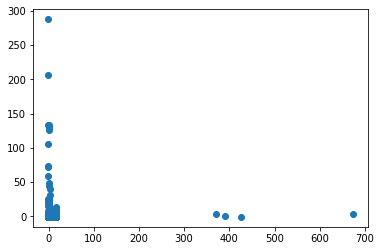

In [ ]:
plt.scatter(train_scale[:,0],train_scale[:,1])
plt.show()

In [ ]:
train[train['distance']>800]
# 11분만에 800km 이상을 갔다?

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
184925,2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,1240.910391
974378,1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,891.215334


In [ ]:
train[train['distance']>600]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance
184925,2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,1240.910391
974378,1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,891.215334


In [ ]:
from datetime import time,date,timedelta,datetime

In [ ]:
t1 = (train['pickup_datetime'].str.split(' ')).apply(lambda x : x[0])
t2 = (train['pickup_datetime'].str.split(' ')).apply(lambda x : x[1])

In [ ]:
# t1 = (test_1['pickup_datetime'].str.split(' ')).apply(lambda x : x[0])
# t2 = (test_1['pickup_datetime'].str.split(' ')).apply(lambda x : x[1])

In [ ]:
t1

0          2016-03-14
1          2016-06-12
2          2016-01-19
3          2016-04-06
4          2016-03-26
              ...    
1458639    2016-04-08
1458640    2016-01-10
1458641    2016-04-22
1458642    2016-01-05
1458643    2016-04-05
Name: pickup_datetime, Length: 1458644, dtype: object

In [ ]:
t2

0          17:24:55
1          00:43:35
2          11:35:24
3          19:32:31
4          13:30:55
             ...   
1458639    13:31:04
1458640    07:35:15
1458641    06:57:41
1458642    15:56:26
1458643    14:44:25
Name: pickup_datetime, Length: 1458644, dtype: object

In [ ]:
day1 = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
month1 = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
week_day = []
month_1 = t1.apply(lambda x:int(x.split('-')[1]))
month_2 = []
for i in range(len(t1)):
    week_day.append(day1[date.fromisoformat(t1[i]).weekday()])
    month_2.append(month1[month_1[i]])

In [ ]:
np.unique(week_day,return_counts=True)

(array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='<U3'),
 array([223533, 187418, 220868, 195366, 218574, 202749, 210136]))

In [ ]:
month_2

['Mar',
 'Jun',
 'Jan',
 'Apr',
 'Mar',
 'Jan',
 'Jun',
 'May',
 'May',
 'Mar',
 'May',
 'May',
 'Feb',
 'Jun',
 'May',
 'May',
 'Apr',
 'Apr',
 'Jun',
 'Jun',
 'Feb',
 'Apr',
 'Apr',
 'Jun',
 'Jun',
 'Feb',
 'Feb',
 'Jun',
 'Jun',
 'Mar',
 'May',
 'May',
 'May',
 'Apr',
 'Jan',
 'Mar',
 'Jan',
 'Jun',
 'May',
 'May',
 'Apr',
 'Apr',
 'Mar',
 'Mar',
 'Feb',
 'Jun',
 'Jan',
 'Feb',
 'May',
 'Apr',
 'Jan',
 'May',
 'Feb',
 'Apr',
 'May',
 'Apr',
 'Jan',
 'Apr',
 'Mar',
 'Mar',
 'Feb',
 'Jan',
 'May',
 'May',
 'Apr',
 'May',
 'Feb',
 'Jun',
 'Mar',
 'Feb',
 'Jun',
 'Mar',
 'Feb',
 'Feb',
 'Mar',
 'Mar',
 'May',
 'Jun',
 'Mar',
 'Apr',
 'Jun',
 'Feb',
 'Jan',
 'Jun',
 'Jun',
 'Jan',
 'Apr',
 'May',
 'Jan',
 'Jun',
 'May',
 'May',
 'May',
 'Mar',
 'Feb',
 'Jan',
 'Jun',
 'Feb',
 'Mar',
 'Apr',
 'Jun',
 'May',
 'Feb',
 'Mar',
 'Jun',
 'Jan',
 'Apr',
 'May',
 'May',
 'Jan',
 'Feb',
 'May',
 'Mar',
 'Jan',
 'Jan',
 'Jun',
 'May',
 'Apr',
 'Jan',
 'Feb',
 'Apr',
 'Jan',
 'Jan',
 'Jun',
 'Jun',


In [ ]:
week_day

['Mon',
 'Sun',
 'Tue',
 'Wed',
 'Sat',
 'Sat',
 'Fri',
 'Sat',
 'Fri',
 'Thu',
 'Tue',
 'Sun',
 'Fri',
 'Wed',
 'Fri',
 'Mon',
 'Mon',
 'Thu',
 'Mon',
 'Sun',
 'Sun',
 'Fri',
 'Sat',
 'Sat',
 'Fri',
 'Sun',
 'Sat',
 'Mon',
 'Mon',
 'Wed',
 'Tue',
 'Sat',
 'Tue',
 'Sun',
 'Sat',
 'Fri',
 'Tue',
 'Thu',
 'Fri',
 'Tue',
 'Thu',
 'Thu',
 'Mon',
 'Sat',
 'Fri',
 'Mon',
 'Sun',
 'Fri',
 'Wed',
 'Sun',
 'Tue',
 'Sat',
 'Mon',
 'Wed',
 'Sun',
 'Tue',
 'Sat',
 'Fri',
 'Mon',
 'Sat',
 'Mon',
 'Thu',
 'Fri',
 'Tue',
 'Sun',
 'Sat',
 'Mon',
 'Sat',
 'Fri',
 'Wed',
 'Tue',
 'Wed',
 'Sat',
 'Sat',
 'Thu',
 'Sun',
 'Mon',
 'Fri',
 'Wed',
 'Tue',
 'Sat',
 'Thu',
 'Thu',
 'Sun',
 'Mon',
 'Sat',
 'Wed',
 'Fri',
 'Thu',
 'Fri',
 'Fri',
 'Sun',
 'Wed',
 'Thu',
 'Sat',
 'Wed',
 'Thu',
 'Thu',
 'Wed',
 'Fri',
 'Wed',
 'Wed',
 'Fri',
 'Tue',
 'Mon',
 'Wed',
 'Sat',
 'Fri',
 'Tue',
 'Sun',
 'Thu',
 'Sun',
 'Sat',
 'Tue',
 'Sat',
 'Mon',
 'Mon',
 'Mon',
 'Thu',
 'Tue',
 'Wed',
 'Mon',
 'Thu',
 'Fri',
 'Thu',


In [ ]:
train['week_day'] = week_day
train['month'] = month_2
train['time'] = t2
train['day'] = t1.apply(lambda x:int(x.split('-')[2]))

In [ ]:
# test_1['week_day'] = week_day
# test_1['month'] = month_2
# test_1['time'] = t2
# test_1['day'] = t1.apply(lambda x:int(x.split('-')[2]))

In [ ]:
np.unique(train['week_day'],return_counts=True)

(array(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype=object),
 array([223533, 187418, 220868, 195366, 218574, 202749, 210136]))

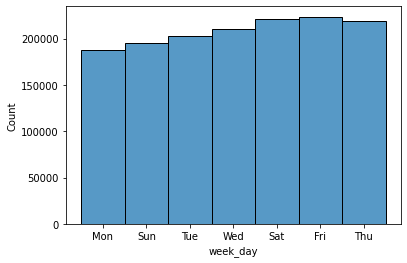

In [ ]:
sns.histplot(train['week_day'])
plt.show()

In [ ]:
np.unique(train['month'],return_counts=True)

(array(['Apr', 'Feb', 'Jan', 'Jun', 'Mar', 'May'], dtype=object),
 array([251645, 238300, 229707, 234316, 256189, 248487]))

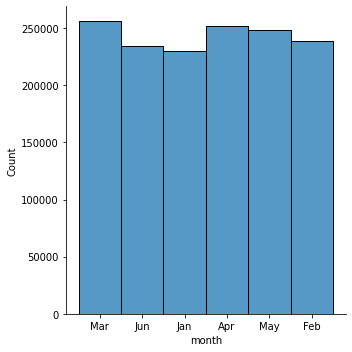

In [ ]:
sns.displot(train['month'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


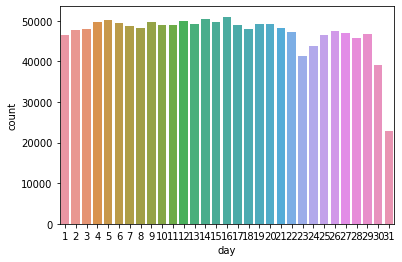

In [ ]:
sns.countplot(train['day'])
plt.show()

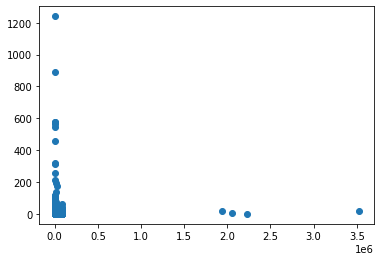

In [ ]:
plt.scatter(train['trip_duration'],train['distance'])
plt.show()

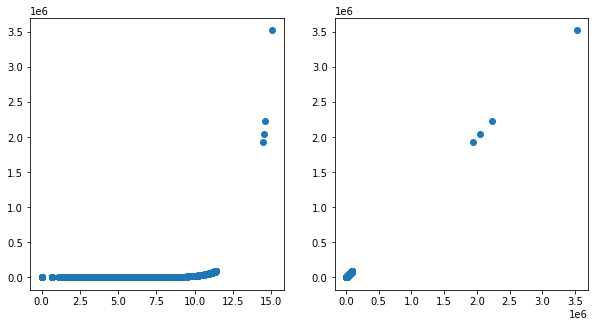

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(np.log(train['trip_duration']),train['trip_duration'])
axes[1].scatter(train['trip_duration'],train['trip_duration'])
plt.show()

In [ ]:
train[train['distance']>800]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,week_day,month,time,day
184925,2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792,1240.910391,Sat,May,18:58:53,7
974378,1510552,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,891.215334,Wed,Jan,20:40:52,6


In [ ]:
train[train['trip_duration']>80000]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,week_day,month,time,day
531,3307903,2,2016-02-20 04:03:06,2016-02-21 03:33:00,3,-74.008102,40.741489,-74.009956,40.714611,N,84594,2.992821,Sat,Feb,04:03:06,20
1134,1091477,2,2016-05-07 18:36:22,2016-05-08 18:32:11,1,-73.990242,40.750919,-73.976280,40.750889,N,86149,1.176095,Sat,May,18:36:22,7
1865,3431345,2,2016-06-07 12:58:48,2016-06-08 12:58:00,6,-73.954956,40.777649,-73.981033,40.743713,N,86352,4.366110,Tue,Jun,12:58:48,7
3442,1487069,2,2016-02-13 00:21:49,2016-02-14 00:19:05,1,-73.968590,40.799217,-73.979584,40.784714,N,86236,1.859418,Sat,Feb,00:21:49,13
4172,3674870,2,2016-03-18 11:54:20,2016-03-19 11:34:17,1,-73.989090,40.736992,-73.972336,40.751511,N,85197,2.144415,Fri,Mar,11:54:20,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454858,2743253,2,2016-06-23 16:04:53,2016-06-24 16:01:33,1,-74.008759,40.719040,-73.972305,40.749691,N,86200,4.588027,Thu,Jun,16:04:53,23
1456458,2055880,2,2016-02-08 19:11:31,2016-02-09 19:08:44,3,-73.973282,40.760792,-73.988518,40.764210,N,86233,1.338294,Mon,Feb,19:11:31,8
1457207,1910950,2,2016-06-08 16:29:12,2016-06-09 16:11:03,1,-73.958061,40.800869,-73.964119,40.805515,N,85311,0.725879,Wed,Jun,16:29:12,8
1457752,1215198,2,2016-02-02 11:31:10,2016-02-03 11:29:44,6,-73.972069,40.794220,-73.961014,40.806728,N,86314,1.673447,Tue,Feb,11:31:10,2


In [ ]:
movement = train['distance']/train['trip_duration']

print(movement)
print(max(movement), min(movement), movement.mean())

0          0.003293
1          0.002723
2          0.003006
3          0.003463
4          0.002732
             ...   
1458639    0.001575
1458640    0.009236
1458641    0.010242
1458642    0.002929
1458643    0.005727
Length: 1458644, dtype: float64
2.576347095053488 0.0 0.004006452469829504


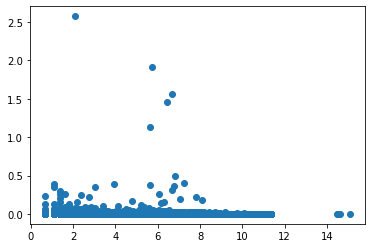

In [ ]:
plt.scatter(np.log1p(train['trip_duration']),movement)
plt.show()

- F-1머신 : 초속 0.09km/sec

- 보잉747 : 초속 0.28km/sec

- F-15전투기 : 초속 0.8km/sec 

- AIM-120암람미사일 : 초속 1.3km/sec﻿

- K1 전차의 날탄 : 초속 1.5km/sec

- 패트리어트미사일 : 초속 1.7km/sec

- 스커드미사일 : 초속 2km/sec

- 북한의 장거리미사일 : 초속 4~5km/sec

- 미국, 러시아의 ICBM : 초속 6.8km/sec

- 국제우주정거장 : 초속 7.7km/sec  (지구궤도 300km고도 즈음에서 떨어지지 않고 공전할 수 있는 속도 -> 위성궤도 최저속도)

- 우주왕복선 : 초속 8km/sec

- 아폴로우주선 : 초속 11.1km/sec (지구 중력권탈출속도는 11.2km/sec)

- 파이오니아호 : 2000년대 초반에 관측한 속도(지구와의 상대속도)는 초속 12km/sec (마하 35)

- 보이저 2호:  2010년 관측결과 초속 15.48km/sec (마하 45)

- 보이저 1호 : 2010년 관측결과 초속 17.07km/sec (마하 50)

- 헬리오스 2호 : 1976년 발사하고 태양중력에 끌려가며 최대초속 70.22km/sec (마하 206) => 인류가 만든 가장 빠른 물체

출처 : https://m.blog.naver.com/PostView.naver?blogId=chsshim&logNo=50157181296&proxyReferer=https:%2F%2Fwww.google.com%2F

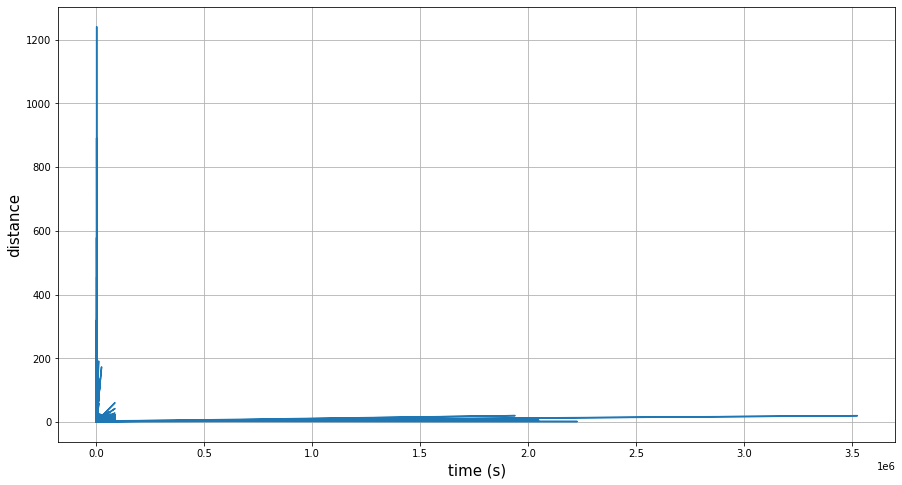

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(train['trip_duration'],train['distance'])
plt.xlabel('time (s)', size=15)
plt.ylabel('distance', size=15)
plt.grid(True)
plt.show()

In [ ]:
train[movement>2]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,week_day,month,time,day
1176337,3619353,2,2016-02-13 20:28:30,2016-02-13 20:28:37,1,-73.936974,40.76461,-73.789848,40.646858,N,7,18.03443,Sat,Feb,20:28:30,13


In [ ]:
train[movement==0]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,week_day,month,time,day
246,3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0,Mon,Feb,18:39:12,29
291,924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,0.0,Tue,May,18:07:52,10
407,1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0,Mon,May,23:15:13,16
702,3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0,Mon,Jan,19:45:12,25
1620,753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0,Wed,Jan,22:29:31,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456399,618137,2,2016-02-17 08:57:04,2016-02-17 09:18:28,1,-73.978859,40.756721,-73.978859,40.756721,N,1284,0.0,Wed,Feb,08:57:04,17
1456627,1048767,2,2016-02-06 22:01:40,2016-02-06 22:03:47,1,-73.963554,40.768517,-73.963554,40.768517,N,127,0.0,Sat,Feb,22:01:40,6
1456989,2595295,2,2016-03-12 07:37:16,2016-03-12 07:46:42,1,-73.984848,40.728222,-73.984848,40.728222,N,566,0.0,Sat,Mar,07:37:16,12
1457114,51314,2,2016-04-09 20:34:21,2016-04-09 20:44:53,1,-73.965981,40.770988,-73.965981,40.770988,N,632,0.0,Sat,Apr,20:34:21,9


In [ ]:
train['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [ ]:
temp = train[['distance','trip_duration']]

In [ ]:
ss = StandardScaler()
train_scale = ss.fit_transform(temp)
train_scale

array([[-0.45207182, -0.0963244 ],
       [-0.38062209, -0.05661026],
       [ 0.68525766,  0.22234335],
       ...,
       [ 1.02029665, -0.03732599],
       [-0.54655651, -0.11198093],
       [-0.53690267, -0.14539426]])

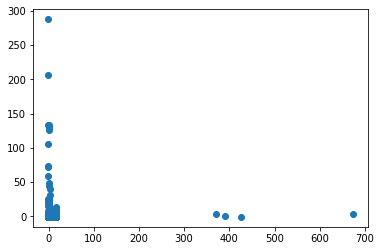

In [ ]:
plt.scatter(train_scale[:,1],train_scale[:,0])
plt.show()

In [ ]:
hour_ = []
temp = train['time'].str.split(':')
for i in range(len(train)):
  hour_.append(temp[i][0])

In [ ]:
# hour_ = []
# temp = test_1['time'].str.split(':')
# for i in range(len(test_1)):
#   hour_.append(temp[i][0])

(array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype='<U2'), array([53248, 38571, 27972, 20895, 15792, 15002, 33248, 55600, 67053,
       67663, 65437, 68476, 71873, 71473, 74292, 71811, 64313, 76483,
       90600, 90308, 84072, 84185, 80492, 69785]))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


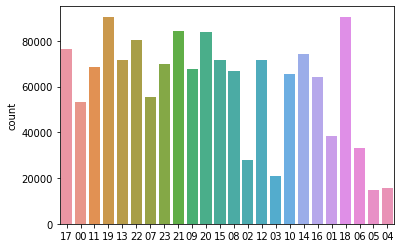

In [ ]:
print(np.unique(hour_,return_counts=True))
sns.countplot(hour_)
plt.show()

In [ ]:
train = pd.concat([train,pd.get_dummies(train['store_and_fwd_flag'],prefix = 's and f')],axis=1)
train = pd.concat([train,pd.get_dummies(train['vendor_id'],prefix='vendor')],axis=1)

train.drop(['vendor_id','store_and_fwd_flag'],axis=1,inplace=True)

In [ ]:
# test_1 = pd.concat([test_1,pd.get_dummies(test_1['store_and_fwd_flag'],prefix = 's and f')],axis=1)
# test_1 = pd.concat([test_1,pd.get_dummies(test_1['vendor_id'],prefix='vendor')],axis=1)

# test_1.drop(['vendor_id','store_and_fwd_flag'],axis=1,inplace=True)

In [ ]:
train.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
0,2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,Mon,Mar,17:24:55,14,1,0,0,1
1,2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,Sun,Jun,00:43:35,12,1,0,1,0
2,3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385107,Tue,Jan,11:35:24,19,1,0,0,1
3,3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485500,Wed,Apr,19:32:31,6,1,0,0,1
4,2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,Sat,Mar,13:30:55,26,1,0,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1458644 non-null  int64  
 1   pickup_datetime    1458644 non-null  object 
 2   dropoff_datetime   1458644 non-null  object 
 3   passenger_count    1458644 non-null  int64  
 4   pickup_longitude   1458644 non-null  float64
 5   pickup_latitude    1458644 non-null  float64
 6   dropoff_longitude  1458644 non-null  float64
 7   dropoff_latitude   1458644 non-null  float64
 8   trip_duration      1458644 non-null  int64  
 9   distance           1458644 non-null  float64
 10  week_day           1458644 non-null  object 
 11  month              1458644 non-null  object 
 12  time               1458644 non-null  object 
 13  day                1458644 non-null  int64  
 14  s and f_N          1458644 non-null  uint8  
 15  s and f_Y          1458644 non-n

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# week_day,month의 경우 문자로 사용하여 다시 int형태로 바꿔줘야 하는데 원핫인코딩을 사용할 경우 sparse해질수있기에 LabelEncoder를 사용하여 칼럼을 재구성.
Label = LabelEncoder()
train['week_day'] = Label.fit_transform(train['week_day'])
train['month'] = Label.fit_transform(train['month'])

In [ ]:
# # week_day,month의 경우 문자로 사용하여 다시 int형태로 바꿔줘야 하는데 원핫인코딩을 사용할 경우 sparse해질수있기에 LabelEncoder를 사용하여 칼럼을 재구성.
# Label = LabelEncoder()
# test_1['week_day'] = Label.fit_transform(test_1['week_day'])
# test_1['month'] = Label.fit_transform(test_1['month'])

In [ ]:
hour = []

for i in range(len(hour_)):
  hour.append(int(hour_[i]))

In [ ]:
train['time'] = hour

In [ ]:
# test_1['time'] = hour

In [ ]:
train.head()

,id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
0,2875421,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,1,4,17,14,1,0,0,1
1,2377394,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,3,3,0,12,1,0,1,0
2,3858529,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385107,5,2,11,19,1,0,0,1
3,3504673,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485500,6,0,19,6,1,0,0,1
4,2181028,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,2,4,13,26,1,0,0,1


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 18 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   id                 1458644 non-null  int64  
 1   pickup_datetime    1458644 non-null  object 
 2   dropoff_datetime   1458644 non-null  object 
 3   passenger_count    1458644 non-null  int64  
 4   pickup_longitude   1458644 non-null  float64
 5   pickup_latitude    1458644 non-null  float64
 6   dropoff_longitude  1458644 non-null  float64
 7   dropoff_latitude   1458644 non-null  float64
 8   trip_duration      1458644 non-null  int64  
 9   distance           1458644 non-null  float64
 10  week_day           1458644 non-null  int64  
 11  month              1458644 non-null  int64  
 12  time               1458644 non-null  int64  
 13  day                1458644 non-null  int64  
 14  s and f_N          1458644 non-null  uint8  
 15  s and f_Y          1458644 non-n

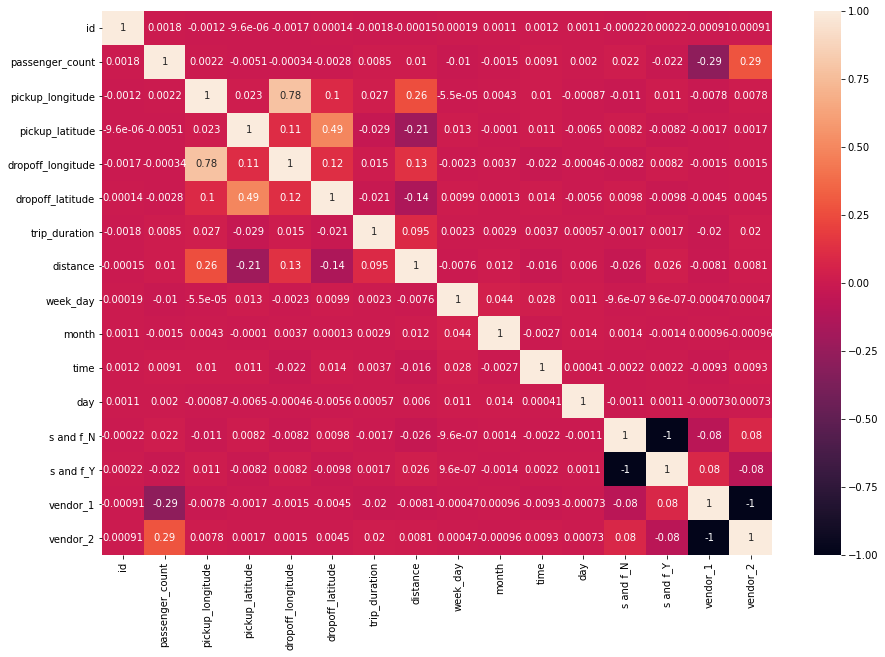

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True)
plt.show()

dropoff_longitude와 pickup_longtitude 0.78로 매우 강한 양의 상관관계
dropoff_latitude와 pickup_latitude 0.49로 강한 양의 상관관계를 지닌다.

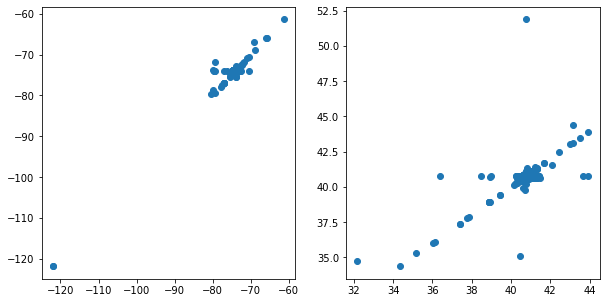

In [ ]:
fig,axes = plt.subplots(1,2,figsize=(10,5))
axes[0].scatter(train['dropoff_longitude'],train['pickup_longitude'])
axes[1].scatter(train['dropoff_latitude'],train['pickup_latitude'])
plt.show()

In [ ]:
import folium

In [ ]:
center = pickup
lines = dropoff

In [ ]:
  map = folium.Map(location=[40.6643,-73.9385],zoom_start=10)

  folium.PolyLine(
      locations = lines[:1000],
      tooltip = 'PolyLine'
  ).add_to(map)

In [ ]:
map

In [ ]:
map = folium.Map(location=center[0],zoom_start=10)

folium.PolyLine(
      locations = lines[:2],
      tooltip = 'PolyLine'
  ).add_to(map)

In [ ]:
map

Folium 사용법 참조:
https://dailyheumsi.tistory.com/m/144?category=854906

뉴욕 중심	위도: 40.6643, 경도: -73.9385 40° 39′ 51″ 북쪽, 73° 56′ 19″ 서쪽

In [ ]:
train = train[train['distance']<200]

In [ ]:
train.drop(['pickup_datetime'],axis=1,inplace=True)
# pickup_datetime의 경우 칼럼을 분류해줬기에 삭제해준다.
train.drop(['dropoff_datetime'],axis=1,inplace=True)
# test데이터에 없기에 삭제해줬다.

In [ ]:
# test_1.drop(['pickup_datetime'],axis=1,inplace=True)
# test_1.drop(['id'],axis=1,inplace=True)

In [ ]:
train

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
0,2875421,1,-73.982155,40.767937,-73.964630,40.765602,455,1.498523,1,4,17,14,1,0,0,1
1,2377394,1,-73.980415,40.738564,-73.999481,40.731152,663,1.805510,3,3,0,12,1,0,1,0
2,3858529,1,-73.979027,40.763939,-74.005333,40.710087,2124,6.385107,5,2,11,19,1,0,0,1
3,3504673,1,-74.010040,40.719971,-74.012268,40.706718,429,1.485500,6,0,19,6,1,0,0,1
4,2181028,1,-73.973053,40.793209,-73.972923,40.782520,435,1.188590,2,4,13,26,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2376096,4,-73.982201,40.745522,-73.994911,40.740170,778,1.225082,0,0,13,8,1,0,0,1
1458640,1049543,1,-74.000946,40.747379,-73.970184,40.796547,655,6.049844,3,2,7,10,1,0,1,0
1458641,2304944,1,-73.959129,40.768799,-74.004433,40.707371,764,7.824617,0,0,6,22,1,0,0,1
1458642,2714485,1,-73.982079,40.749062,-73.974632,40.757107,373,1.092565,5,2,15,5,1,0,1,0


In [ ]:
train['trip_duration'] = np.log(train['trip_duration'])

In [ ]:
train[train['trip_duration']>12]

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
355003,1864733,1,-73.789650,40.643559,-73.956810,40.773087,14.478062,20.148692,5,2,0,5,1,0,1,0
680594,369307,2,-73.921677,40.735252,-73.984749,40.759979,14.533144,5.982495,2,1,22,13,1,0,1,0
924150,1325766,1,-73.983788,40.742325,-73.985489,40.727676,14.616441,1.635130,5,2,6,5,1,0,1,0
978383,53347,1,-73.783905,40.648632,-73.978271,40.750202,15.075755,19.900689,2,1,22,13,1,0,1,0


In [ ]:
train[train['trip_duration']<0.5]

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
35196,2536510,1,-73.940384,40.786423,-73.940300,40.786373,0.0,0.008963,3,0,11,17,1,0,1,0
207497,1520236,1,-73.819893,40.740822,-73.819885,40.740822,0.0,0.000643,5,5,9,17,1,0,1,0
269418,553321,1,-73.945999,40.792202,-73.947411,40.792740,0.0,0.133024,1,0,19,11,1,0,0,1
279493,1491861,1,-73.841423,40.695278,-73.841423,40.695274,0.0,0.000424,3,0,11,24,1,0,1,0
285635,75470,1,-73.980690,40.744419,-73.980690,40.744419,0.0,0.000000,1,4,16,7,1,0,1,0
311745,2959956,1,-73.806152,40.660206,-73.806267,40.660049,0.0,0.019891,4,1,4,25,1,0,1,0
346102,2375785,1,-73.985825,40.755760,-73.985901,40.755829,0.0,0.009980,0,2,23,15,1,0,1,0
346959,1171557,1,-73.776512,40.646454,-73.776512,40.646454,0.0,0.000000,6,1,16,10,1,0,1,0
404610,3686648,1,-73.971954,40.750137,-73.971985,40.750130,0.0,0.002707,0,2,11,29,1,0,1,0
451396,2836747,1,-74.001610,40.737450,-74.001610,40.737450,0.0,0.000000,5,2,10,26,1,0,1,0


In [ ]:
train = train[train['trip_duration']<12]

In [ ]:
import statsmodels.api as sm

In [ ]:
print(train.shape,test.shape)

(1458629, 16) (625134, 9)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
test_1.shape

(625134, 14)

In [ ]:
test_1

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
0,1,-73.988129,40.732029,-73.990173,40.756680,2.746430,4,3,23,30,1,0,1,0
1,1,-73.964203,40.679993,-73.959808,40.655403,2.759243,4,3,23,30,1,0,1,0
2,1,-73.997437,40.737583,-73.986160,40.729523,1.306157,4,3,23,30,1,0,1,0
3,1,-73.956070,40.771900,-73.986427,40.730469,5.269095,4,3,23,30,1,0,0,1
4,1,-73.970215,40.761475,-73.961510,40.755890,0.960843,4,3,23,30,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625129,1,-74.003464,40.725105,-74.001251,40.733643,0.967439,0,2,0,1,1,0,1,0
625130,1,-74.006363,40.743782,-73.953407,40.782467,6.196352,0,2,0,1,1,0,1,0
625131,2,-73.972267,40.759865,-73.876602,40.748665,8.153730,0,2,0,1,1,0,1,0
625132,1,-73.976501,40.733562,-73.854263,40.891788,20.380776,0,2,0,1,1,0,1,0


In [ ]:
train.shape

(1458629, 16)

In [ ]:
train.head()

,id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,week_day,month,time,day,s and f_N,s and f_Y,vendor_1,vendor_2
0,2875421,1,-73.982155,40.767937,-73.964630,40.765602,6.120297,1.498523,1,4,17,14,1,0,0,1
1,2377394,1,-73.980415,40.738564,-73.999481,40.731152,6.496775,1.805510,3,3,0,12,1,0,1,0
2,3858529,1,-73.979027,40.763939,-74.005333,40.710087,7.661056,6.385107,5,2,11,19,1,0,0,1
3,3504673,1,-74.010040,40.719971,-74.012268,40.706718,6.061457,1.485500,6,0,19,6,1,0,0,1
4,2181028,1,-73.973053,40.793209,-73.972923,40.782520,6.075346,1.188590,2,4,13,26,1,0,0,1


In [ ]:
X = train.drop(['trip_duration','id'],axis=1)
y = train['trip_duration']

In [ ]:
x_constant = sm.add_constant(X)

In [ ]:
model = sm.OLS(y,x_constant)

In [ ]:
lin_reg = model.fit()

In [ ]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                 8.000e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        04:13:09   Log-Likelihood:            -1.3745e+06
No. Observations:             1458629   AIC:                         2.749e+06
Df Residuals:                 1458616   BIC:                         2.749e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.9765      0.536    -46.630      0.000     -26.026     -23.927
passenger_count       0.0068      0.000     16.548      0.000       0.006       0.008
pickup_longitude     -0.8197      0.012    -66.524      0.000      -0.844      -0.796
pickup_latitude       1.6288      0.020     80.241      0.000       1.589       1.669
dropoff_longitude     0.1633      0.012     13.229      0.000       0.139       0.187
dropoff_latitude     -1.4508      0.017    -83.637      0.000      -1.485      -1.417
distance              0.1309      0.000    922.714      0.000       0.131       0.131
week_day              0.0110      0.000     42.930      0.000       0.010       0.011
month                 0.0043      0.000     14.602      0.000       0.004       0.005
time                  0.0064   8.05e-05     79.077      0.000       0.006       0.007
day                   0.0005   5.91e-05      8.455      0.000       0.000       0.001
s and f_N           -12.4786      0.268    -46.589      0.000     -13.004     -11.954
s and f_Y           -12.4980      0.268    -46.664      0.000     -13.023     -11.973
vendor_1            -12.4968      0.268    -46.662      0.000     -13.022     -11.972
vendor_2            -12.4798      0.268    -46.598      0.000     -13.005     -11.955
==============================================================================
Omnibus:                   470896.005   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26919792.595
Skew:                          -0.752   Prob(JB):                         0.00
Kurtosis:                      23.992   Cond. No.                     1.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.45e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                 7.384e+04
Date:                Wed, 26 May 2021   Prob (F-statistic):               0.00
Time:                        03:51:55   Log-Likelihood:            -1.3745e+06
No. Observations:             1458629   AIC:                         2.749e+06
Df Residuals:                 1458615   BIC:                         2.749e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -24.9764      0.536    -46.630      0.000     -26.026     -23.927
id                 8.526e-10   4.45e-10      1.915      0.055      -2e-11    1.73e-09
passenger_count       0.0068      0.000     16.545      0.000       0.006       0.008
pickup_longitude     -0.8197      0.012    -66.524      0.000      -0.844      -0.796
pickup_latitude       1.6288      0.020     80.241      0.000       1.589       1.669
dropoff_longitude     0.1633      0.012     13.231      0.000       0.139       0.187
dropoff_latitude     -1.4508      0.017    -83.637      0.000      -1.485      -1.417
distance              0.1309      0.000    922.714      0.000       0.131       0.131
week_day              0.0110      0.000     42.930      0.000       0.010       0.011
month                 0.0043      0.000     14.600      0.000       0.004       0.005
time                  0.0064   8.05e-05     79.075      0.000       0.006       0.007
day                   0.0005   5.91e-05      8.452      0.000       0.000       0.001
s and f_N           -12.4785      0.268    -46.589      0.000     -13.003     -11.954
s and f_Y           -12.4979      0.268    -46.663      0.000     -13.023     -11.973
vendor_1            -12.4967      0.268    -46.662      0.000     -13.022     -11.972
vendor_2            -12.4797      0.268    -46.598      0.000     -13.005     -11.955
==============================================================================
Omnibus:                   470891.993   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26919858.333
Skew:                          -0.752   Prob(JB):                         0.00
Kurtosis:                      23.992   Cond. No.                     9.55e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.52e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

모델의 설명력은 39.7%이며 p-value를 봤을 때 유의수준 0.05%이기에 id를 제외한 모든 변수의 경우 trip_duration을 예측하는데 영향이 있다. 그래서 id를 지워줌

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [ ]:
train_scale = ss.fit_transform(X_train)
test_scale = ss.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sr = SGDRegressor(random_state=42)

In [ ]:
sr.fit(train_scale,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sr.score(train_scale,y_train)
# id 제거 전

-22.81108375352942

In [ ]:
sr.score(train_scale,y_train)
# id 제거 후

-22.859950846083283

In [ ]:
sr.partial_fit(train_scale,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
print(sr.score(train_scale,y_train))
print(sr.score(test_scale,y_test))
# id 제거 전 

0.3164047019333549
0.3197011096590322


In [ ]:
print(sr.score(train_scale,y_train))
print(sr.score(test_scale,y_test))
# id 제거 후

0.31641408878263544
0.3197151734668135


In [ ]:
train_score = []
test_score = []
for _ in range(1500):
  train_score.append(sr.score(train_scale,y_train))
  test_score.append(sr.score(test_scale,y_test))

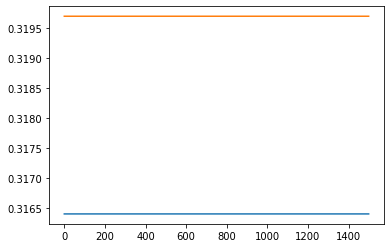

In [ ]:
plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [ ]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=42)

In [ ]:
dt.fit(train_scale,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
print(dt.score(train_scale,y_train))
print(dt.score(test_scale,y_test))
# id 제거 전

0.9999999998951835
0.3661962215509684


In [ ]:
print(dt.score(train_scale,y_train))
print(dt.score(test_scale,y_test))
# id 제거 후

0.9999759456761164
0.36485482669552527


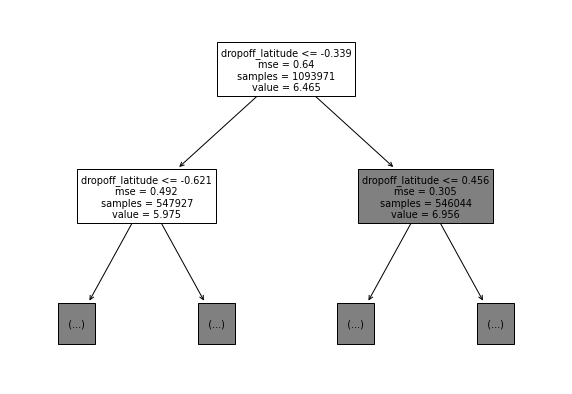

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,feature_names=['id','vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration','distance','week_day','month','time','day'])
plt.show()

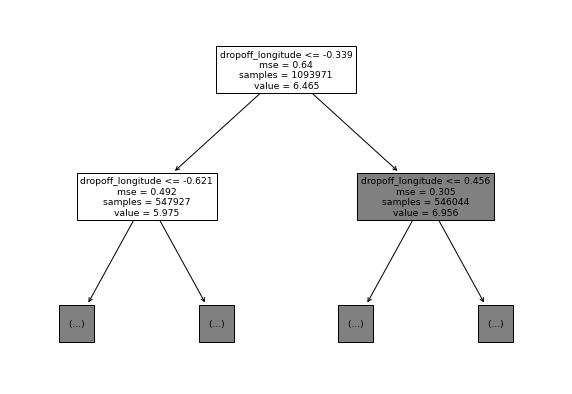

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt,max_depth=1,feature_names=['id','vendor_id','passenger_count','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','trip_duration','distance','week_day','month','time','day'])
plt.show()

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
lgb = LGBMRegressor(random_state=42)

In [ ]:
params = {
    'learning_rate' : [0.01,0.1,0.3],
    'class_weight' : ['balanced',None]
}

In [ ]:
gs = GridSearchCV(lgb,params,n_jobs=-1)

In [ ]:
gs.fit(train_scale,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'learning_rate': [0.01, 0.1, 0.3]},
             pre_dispatch='2*n_jobs', refit=True, return_

In [ ]:
gs.best_params_

{'class_weight': None, 'learning_rate': 0.3}

In [ ]:
dt = gs.best_estimator_
print(dt.score(train_scale,y_train))
print(dt.score(test_scale,y_test))

0.7296819470828138
0.6406726989000203


In [ ]:
lgb.fit(train_scale,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=42, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
print(lgb.score(train_scale,y_train))
print(lgb.score(test_scale,y_test))
# id 제거 전

0.7190226218981486
0.6985911731700779


In [ ]:
print(lgb.score(train_scale,y_train))
print(lgb.score(test_scale,y_test))
# id 제거 후

0.7197712281731927
0.6991783087543642


In [ ]:
pred = lgb.predict(test_1)

In [ ]:
pred_lgb = np.exp(pred)

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()

In [ ]:
xgb.fit(train_scale,y_train)

[04:08:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
print(xgb.score(train_scale,y_train))
print(xgb.score(test_scale,y_test))
# id 제거 전

0.6837732392706752
0.665311799813652


In [ ]:
print(xgb.score(train_scale,y_train))
print(xgb.score(test_scale,y_test))
# id 제거 후

0.6837732392706752
0.665311799813652


In [ ]:
sub = pd.DataFrame()

In [ ]:
sub['id'] = test['id']
sub['trip_duration'] = pred_lgb

In [ ]:
sub

,id,trip_duration
0,id3004672,946.528421
1,id3505355,965.245131
2,id1217141,1003.679949
3,id2150126,1281.409660
4,id1598245,977.405158
...,...,...
625129,id3008929,1049.851236
625130,id3700764,2319.603601
625131,id2568735,2319.603601
625132,id1384355,2319.603601


In [ ]:
sub

,id,trip_duration
0,id3004672,946.528421
1,id3505355,965.245131
2,id1217141,1003.679949
3,id2150126,1281.409660
4,id1598245,977.405158
...,...,...
625129,id3008929,1049.851236
625130,id3700764,2319.603601
625131,id2568735,2319.603601
625132,id1384355,2319.603601


In [ ]:
sub.to_csv('sub2.csv',index=False)

In [ ]:
sub

,id,trip_duration
0,id3004672,946.528421
1,id3505355,965.245131
2,id1217141,1003.679949
3,id2150126,1281.409660
4,id1598245,977.405158
...,...,...
625129,id3008929,1049.851236
625130,id3700764,2319.603601
625131,id2568735,2319.603601
625132,id1384355,2319.603601
